<a href="https://colab.research.google.com/github/stellahrotich/DeepLearning/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing the Gradient Descent Algorithm

Implementing the  Batch Gradient Descent algorithm to find the boundary in a student admissions dataset loaded below obtained from UCI

In [0]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
#load data
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (4).csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

## Reading and plotting the data

In [26]:
# check the instances the dataset has

print(data.shape)

(99, 3)


In [27]:
data.head(99)

0.78051  -0.063669  1
0   0.28774    0.29139  1
1   0.40714    0.17878  1
2   0.29230    0.42170  1
3   0.50922    0.35256  1
4   0.27785    0.10802  1
..      ...        ... ..
94  0.77029    0.70140  0
95  0.73156    0.71782  0
96  0.44556    0.57991  0
97  0.85275    0.85987  0
98  0.51912    0.62359  0

[99 rows x 3 columns]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [0]:
#functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

In [0]:
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

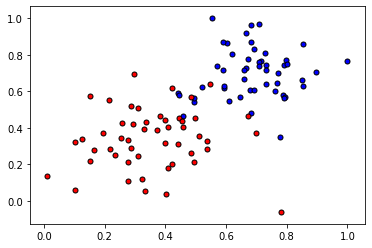

In [29]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

#Implementing the sigmoid and other functions

 Implementing the formulas
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [0]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

In [0]:
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

In [0]:

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [0]:
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

## Training 
This function will iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [0]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black.The lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. It decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


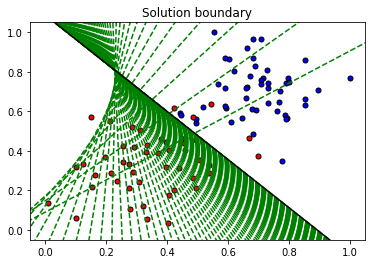

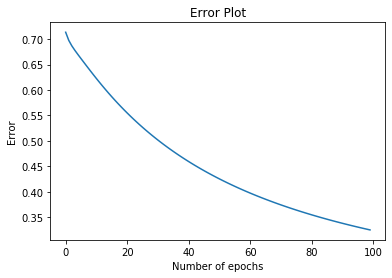

In [43]:
train(X, y, epochs, learnrate, True)